<a href="https://colab.research.google.com/github/DB11051998/Face_count/blob/master/Face-count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import numpy as np
import cv2
from tqdm import tqdm
 

In [0]:
path='/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)'
ls_path=[]
ls_image_path=[]

In [0]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      if dirname != '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data':
        ls_path.append(os.path.join(dirname, filename))
      else:
        ls_image_path.append(os.path.join(dirname, filename))

In [6]:
print('No of images-->>',len(ls_image_path))

No of images-->> 8196


In [7]:
ls_path

['/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/train.csv',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/bbox_train.csv',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/test_Rj9YEaI.csv',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/Untitled.ipynb']

In [0]:
df_train=pd.read_csv(ls_path[0])
df_bbox_train=pd.read_csv(ls_path[1])


In [9]:
ls_image_path

['/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17746.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17747.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17748.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17749.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17750.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17751.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17752.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17753.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17744.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17754.jpg',
 '/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/17755.jpg',
 '/content/drive/My Drive/train_

In [10]:
df_train.head()
#'/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [0]:
img=cv2.imread('/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/'+df_train['Name'][0])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

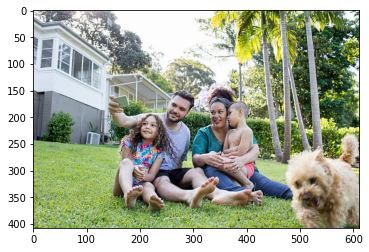

In [12]:

#img=cv2.rectangle(img, (192,199), (230,235), (255, 0, 0),1)
#img=cv2.rectangle(img, (247,168), (291,211), (255, 0, 0),1)
#img=cv2.rectangle(img, (321,176), (366,222), (255, 0, 0),1)
#img=cv2.rectangle(img, (355,183), (387,214), (255, 0, 0),1)
plt.imshow(img)

(43, 44, 3)

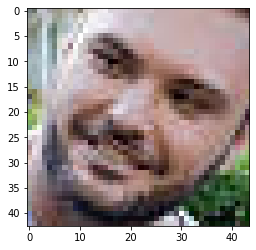

In [13]:
plt.imshow(img[168:211,247:291,:])
img[168:211,247:291,:].shape

In [14]:
df_bbox_train

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202
...,...,...,...,...,...,...,...
24528,18205.jpg,612,425,9,52,52,116
24529,18207.jpg,475,612,160,149,241,226
24530,18207.jpg,475,612,226,47,277,104
24531,18207.jpg,475,612,113,41,179,106


In [15]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 2.4MB/s 


In [16]:
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [17]:
detector = MTCNN()

faces = detector.detect_faces(img)
for face in faces:
    print(face)


{'box': [252, 165, 36, 45], 'confidence': 0.9999933242797852, 'keypoints': {'left_eye': (263, 179), 'right_eye': (278, 186), 'nose': (266, 190), 'mouth_left': (257, 194), 'mouth_right': (271, 201)}}
{'box': [332, 175, 29, 43], 'confidence': 0.998878538608551, 'keypoints': {'left_eye': (337, 192), 'right_eye': (350, 190), 'nose': (342, 200), 'mouth_left': (339, 207), 'mouth_right': (351, 206)}}
{'box': [202, 200, 31, 39], 'confidence': 0.9988225102424622, 'keypoints': {'left_eye': (210, 213), 'right_eye': (224, 216), 'nose': (214, 220), 'mouth_left': (207, 227), 'mouth_right': (220, 230)}}
{'box': [362, 181, 20, 34], 'confidence': 0.9950502514839172, 'keypoints': {'left_eye': (364, 196), 'right_eye': (367, 192), 'nose': (361, 200), 'mouth_left': (367, 208), 'mouth_right': (369, 206)}}


In [0]:
from matplotlib.patches import Rectangle


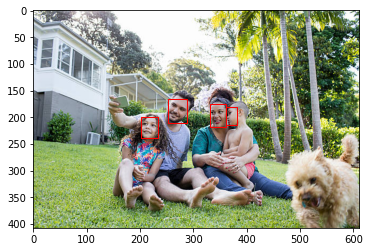

In [19]:
plt.imshow(img)
ax = plt.gca()
for face in faces:
  x, y, width, height = face['box']
  face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
  ax.add_patch(face_border)
plt.show()

In [0]:
df_test=pd.read_csv(ls_path[2])

In [26]:
df_test

,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg
...,...
2458,18197.jpg
2459,18198.jpg
2460,18199.jpg
2461,18202.jpg


In [0]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [0]:
def count_face(df):
  name=df['Name']
  img=cv2.imread('/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/image_data/'+name)
  detector = MTCNN()
  faces = detector.detect_faces(img)
  #print(df['Name'])
  return len(faces)



In [43]:


pred=df_test.progress_apply(count_face,axis=1)

In [37]:
df_test.index

1

In [0]:
sub=pd.read_csv('/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/sample_submission_fChOj3V.csv')

In [0]:
sub['HeadCount']=pred

In [0]:
sub.to_csv('/content/drive/My Drive/train_HNzkrPW (1).zip (Unzipped Files)/submit.csv')